In [123]:
import tensorflow as tf
import tensorflow.keras.datasets as tfds
from utils.layer_units import *
import pydotplus
import numpy as np

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
loaded_model = tf.keras.models.load_model('cifar_100_three_attention_64_3_64_1_resid.h5')

In [125]:
(X_train,y_train),(X_test,y_test) = tfds.cifar100.load_data()

In [126]:
origin_X_test = X_test.copy()

In [127]:
X_valid = X_train[49000:]
y_valid = y_train[49000:]
X_train = X_train[:49000]
y_train = y_train[:49000]

In [128]:
# center but not scale data
# we found scale not very stable
def preprocess(X):
    # pixel wise center
    ret = X.astype(np.float32) - np.mean(X,axis=0)
    return ret

In [129]:
X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

In [130]:
sigmoid_layer = []
for (i,layer) in enumerate(loaded_model.layers):
    print(i)
    print(layer.name)
    if layer.name.find('sigmoid') >= 0:
        sigmoid_layer.append(layer.name)
        

0
input_6
1
conv2d_351
2
batch_normalization_249
3
activation_257
4
conv2d_352
5
batch_normalization_250
6
activation_258
7
conv2d_353
8
batch_normalization_251
9
activation_259
10
conv2d_354
11
conv2d_355
12
add_99
13
max_pooling2d_16
14
batch_normalization_258
15
activation_266
16
conv2d_364
17
batch_normalization_259
18
activation_267
19
conv2d_365
20
batch_normalization_260
21
activation_268
22
conv2d_366
23
conv2d_367
24
add_102
25
max_pooling2d_17
26
batch_normalization_261
27
activation_269
28
conv2d_368
29
batch_normalization_262
30
activation_270
31
conv2d_369
32
batch_normalization_263
33
activation_271
34
conv2d_370
35
conv2d_371
36
add_103
37
batch_normalization_264
38
activation_272
39
batch_normalization_267
40
conv2d_372
41
activation_275
42
batch_normalization_265
43
conv2d_376
44
activation_273
45
batch_normalization_268
46
conv2d_373
47
activation_276
48
batch_normalization_266
49
conv2d_377
50
batch_normalization_252
51
activation_274
52
batch_normalization_269
53
ac

In [148]:
sigmoid_layer

['tf_op_layer_sigmoid_activation_layer_6',
 'tf_op_layer_sigmoid_activation_layer_7',
 'tf_op_layer_sigmoid_activation_layer_8']

In [417]:
layer_output1 = loaded_model.get_layer(sigmoid_layer[0]).output
layer_output2 = loaded_model.get_layer(sigmoid_layer[1]).output
layer_output3 = loaded_model.get_layer(sigmoid_layer[2]).output

In [418]:
import matplotlib.pyplot as plt

In [419]:
# code inspired by https://androidkt.com/get-output-of-intermediate-layers-keras/
inter_model1 = tf.keras.models.Model(inputs = loaded_model.input, outputs = layer_output1)
inter_model2 = tf.keras.models.Model(inputs = loaded_model.input, outputs = layer_output2)
inter_model3 = tf.keras.models.Model(inputs = loaded_model.input, outputs = layer_output3)

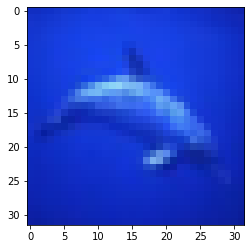

In [460]:
id = 597
inter_pred1 = inter_model1.predict(np.expand_dims(X_test[id],axis = 0))
inter_pred2 = inter_model2.predict(np.expand_dims(X_test[id],axis = 0))
inter_pred3 = inter_model3.predict(np.expand_dims(X_test[id],axis = 0))
plt.imshow(origin_X_test[id])

In [461]:
mask1 = np.mean(inter_pred1[0],axis=-1)
mask1 = np.repeat(mask1,3).reshape((32,32,3))
mask2 = np.mean(inter_pred2[0],axis=-1)
mask2 = np.repeat(mask2,3).reshape((32,32,3))
mask3 = np.mean(inter_pred3[0],axis=-1)
mask3 = np.repeat(mask3,3).reshape((32,32,3))

#mask = inter_pred[0][:,:,-1]
#mask = np.repeat(mask,3).reshape((32,32,3))

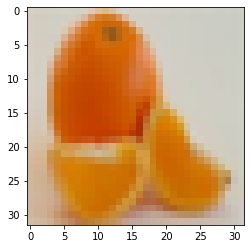

In [439]:
plt.imshow(origin_X_test[id])

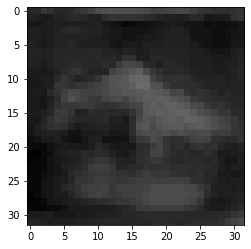

In [462]:
plt.imshow(mask3)

In [463]:
masked_image1 = (origin_X_test[id]*mask1).astype(np.int)
masked_image2 = (origin_X_test[id]*mask2).astype(np.int)
masked_image3 = (origin_X_test[id]*mask3).astype(np.int)

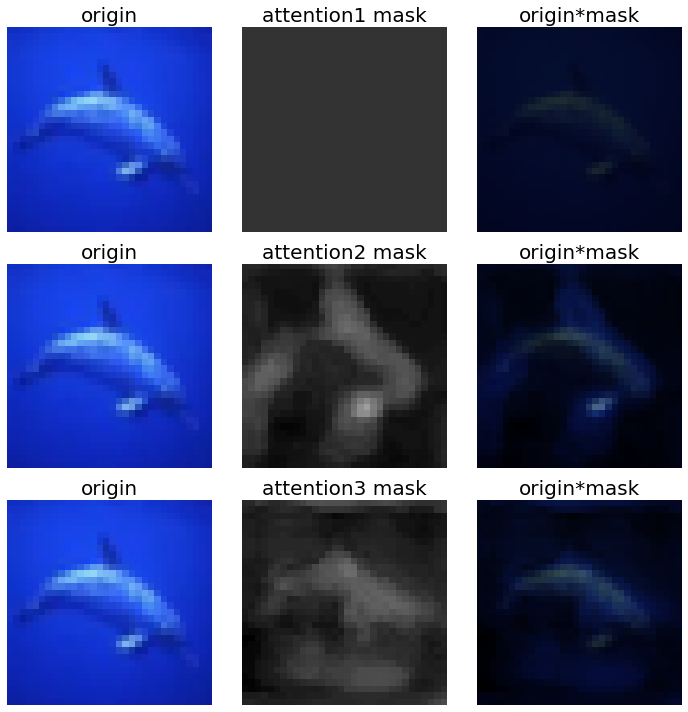

In [464]:
fig,[(ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)] = plt.subplots(3,3,figsize=(10,10))
ax1.imshow(origin_X_test[id])
ax1.axis('off')
ax1.set_title('origin',{'fontsize':20})
ax2.imshow(mask1)
ax2.axis('off')
ax2.set_title('attention1 mask',{'fontsize':20})
ax3.imshow(masked_image1)
ax3.axis('off')
ax3.set_title('origin*mask',{'fontsize':20})

ax4.imshow(origin_X_test[id])
ax4.axis('off')
ax4.set_title('origin',{'fontsize':20})
ax5.imshow(mask2)
ax5.axis('off')
ax5.set_title('attention2 mask',{'fontsize':20})
ax6.imshow(masked_image2)
ax6.axis('off')
ax6.set_title('origin*mask',{'fontsize':20})

ax7.imshow(origin_X_test[id])
ax7.axis('off')
ax7.set_title('origin',{'fontsize':20})
ax8.imshow(mask3)
ax8.axis('off')
ax8.set_title('attention3 mask',{'fontsize':20})
ax9.imshow(masked_image3)
ax9.axis('off')
ax9.set_title('origin*mask',{'fontsize':20})
fig.tight_layout()
plt.savefig('mask_visualization4.png')

